# Support Vector Machine

Es un clasificador definido por un hiperplano.


###### ¿Cómo encontrar la mejor frontera en SVM?

- Partimos de la frontera, buscando la mejor de ellas.

- Las SVM identifican rectas que clasifican correctamente los datos de entrenamiento, y eligen aquella que tiene mayor distancia -o margen- en relación a los puntos más cercanos, a los que llamamos “vectores de soporte”.

###### Un hiperparámetro llamado “C”

- Las SVM buscan, por un lado, un amplio margen y, por el otro, un hiperplano que separe correctamente tantas instancias como sea posible. 

- Un valor más alto de C implica que queremos menos errores en los datos de entrenamiento

- Sin embargo, no siempre se pueden obtener ambas cosas.

- Las SMVs funcionan para cualquier cantidad de dimensiones.

- En tres dimensiones, en lugar de una recta encuentran un plano y en mayores dimensiones un hiperplano. 

###### Qué es un hiperplano?

- En geometría, un hiperplano es una extensión del concepto de plano.

- En un espacio unidimensional (como una recta), un hiperplano es un punto: divide una línea en dos líneas. 

- En un espacio bidimensional (como el plano xy), un hiperplano es una recta: divide el plano en dos mitades. 

- En un espacio tridimensional, un hiperplano es un plano corriente: divide el espacio en dos mitades. 

###### Separación de datos con SVM

- Para datos separables linealmente, las SVM funcionan muy bien (lo visto hasta ahora).

- Para datos que son casi linealmente separables, se puede hacer que las SVM funcionen bastante bien utilizando un parámetro llamado “C”: error.

- Para los datos que no son linealmente separables, podemos proyectar datos en un espacio donde sea perfectamente/casi linealmente separable, lo que reduce el problema a 1 ó 2.

###### El hiperparámetro C

- El hiperparámetro C determina cuán grande es tu deseo de una buena clasificación.

- Es decir, se trata de una solución para cuando estamos frente a un problema más complejo: contamos con un clasificador lineal que no puede separar perfectamente las etiquetas, pero podría hacerlo si aceptáramos cierto nivel de error en la clasificación.

- Dependiendo de tu conjunto de datos, cambiar C va a producir un hiperplano distinto (en mayor o menor medida). 

- Si los datos de entrenamiento no son perfectamente separables, puedes jugar con el valor de C, introduciendo cierto nivel de error en el entrenamiento, con tal de mejorar el rendimiento ante datos nunca vistos.

- Al tratarse de un hiperparámetro, podrás aplicar la misma lógica que hemos usado anteriormente con otros hiperparámetros y decidir cuál es el valor óptimo que permite una mejor clasificación ante datos nunca vistos.


###### El truco de Kernel

- Claramente, la frontera necesaria no se puede obtener mediante ninguna recta. 

- Sin embargo, es posible llegar a algo muy similar proyectando los datos.

- Necesitamos proyectar los datos originales a un espacio donde SÍ sean linealmente separables. 

- Una vez proyectados, a la SVM le resulta muy fácil encontrar el hiperplano que los separe correctamente.

- Para hacer esta proyección se usa un truco matemático conocido como “el truco del kernel”.

- Es más probable que los datos sean linealmente separables cuando se proyectan a dimensiones superiores.

- Lo que hacemos es “pedirle” a la SVM que haga la proyección por nosotros. 

- Los encargados de hacer esas proyecciones se conocen como Kernels.

- Las implementaciones de SVM ya vienen con kernels para usar. Cuando nos enfrentamos a un problema que no es linealmente separable, procedemos a probar entre los kernels: Gaussiano, sigmoide y polinomial.



# Support Vector Machines Example

## 1. Social Network Ads 

En primer lugar vamos a trabajar con el dataset de Social Networks Ads, un conjunto de datos que permiten determinar si un usuario compró o no un producto en particular. Tanto el dataset como su descripción los pueden encontrar en [Kaggle](https://www.kaggle.com/rakeshrau/social-network-ads).

### Columnas del dataset:
* User ID: identificación de usuario.
* Gender: género.
* Age: edad.
* EstimatedSalary: salario estimado.
* Purchased: compró/no compró un producto en particular.

Ahora sí, a trabajar. En primer lugar, recomendamos hacer una pequeña exploración de datos si tienes tiempo. Luego, sigue los pasos que aquí te dejamos. Si te sientes seguro/a, hasta puedes intentar implementar un SVM sobre ese dataset sin mirar la guía que dejamos. En ese caso, te conviene hacerlo en otro notebook. ¡Inténtalo!

1. Importa las librerías necesarias y carga el dataset.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


2. Sólo vamos a utilizar como features las columnas `Age` y `EstimatedSalary` (así podemos visualizar). Y como target a la columna `Purchased`

In [12]:
X = dataset.iloc[:, [2, 3]].values
Y = dataset.iloc[:, 4].values

3. Separa los datos de entrenamiento de los datos de prueba.

In [13]:
from sklearn.model_selection import train_test_split

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state=0)

4. Estandariza los datos (`StandardScaler`).

In [14]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

5. Entrena un SVM. Para ello, utiliza la clase `SVC` de la librería Scikit-Learn cuya documentación la puedes encontrar [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

In [15]:
from sklearn.svm import SVC

classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_Train, Y_Train)

SVC(kernel='linear', random_state=0)

6. Realiza las predicciones sobre los datos de prueba.

In [16]:
Y_Pred = classifier.predict(X_Test)

7. Visualiza los resultados mediante:
 
* Matriz de confusión (`confusion_matrix`)
* Reporte de clasificación (`classification_report`)
* Gráfico de fronteras de decisión (¡Busca en notebooks anteriores!)

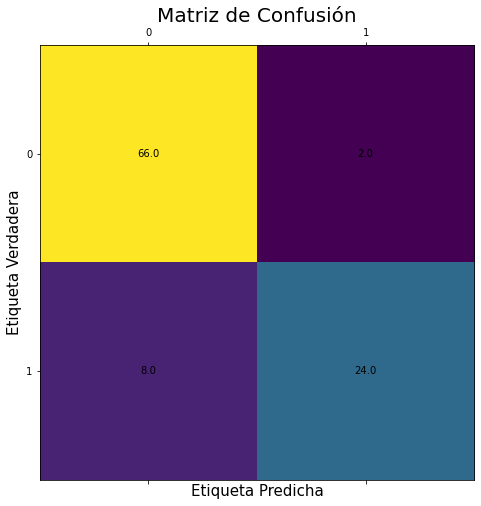

In [17]:
# Matriz de confusión 
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_Test, Y_Pred)

fig, ax = plt.subplots(figsize=(12,8))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [18]:
# Reporte de Clasificación
print(classification_report(Y_Test, Y_Pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100



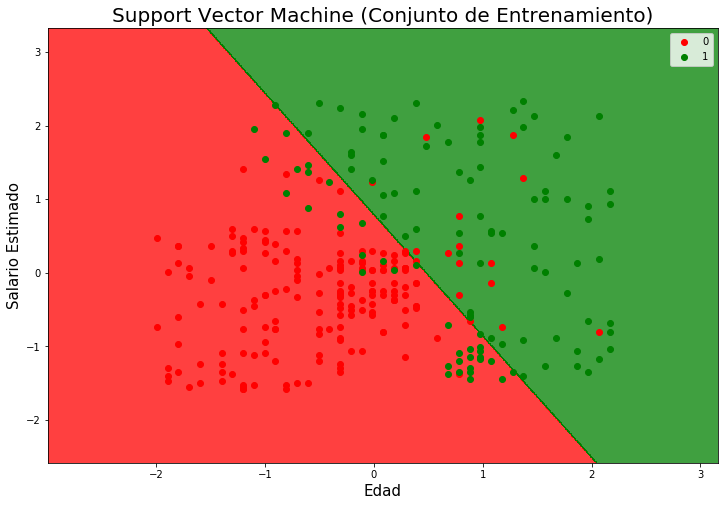

In [10]:
# Visualizando los resultados en el set de entrenamiento
from matplotlib.colors import ListedColormap

X_Set, Y_Set = X_Train, Y_Train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))

plt.figure(figsize=(12,8))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = [ListedColormap(('red', 'green'))(i)], label = j)
plt.title('Support Vector Machine (Conjunto de Entrenamiento)', fontsize=20)
plt.xlabel('Edad', fontsize=15)
plt.ylabel('Salario Estimado', fontsize=15)
plt.legend()
plt.show()

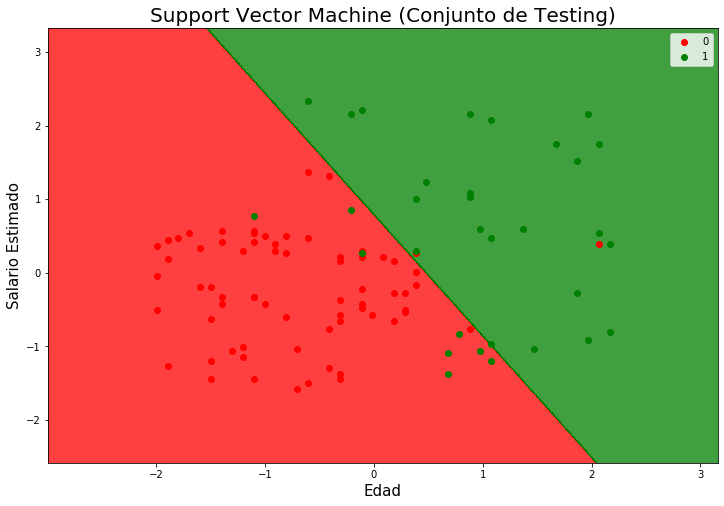

In [11]:
# Visualizando los resultados en el set de testing
X_Set, Y_Set = X_Test, Y_Test
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))

plt.figure(figsize=(12,8))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['red', 'green']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = [ListedColormap(('red', 'green'))(i)], label = j)
plt.title('Support Vector Machine (Conjunto de Testing)', fontsize=20)
plt.xlabel('Edad', fontsize=15)
plt.ylabel('Salario Estimado', fontsize=15)
plt.legend()
plt.show()

**Para probar:**
1. Modifica el `kernel` del clasificador y observar cómo se modifican las fronteras encontradas por el mismo y su performance. Por ejemplo, prueba con con los siguientes kernels: `rbf`, `poly` y `sigmoid`.
2. ¿Cuál es la función del parámetro `Gamma`?
3. Repite el ejercicio 1, modificando los valores de `Gamma`
4. Modifica el parámetro `C` del clasificador y observar cómo se modifican las fronteras encontradas por el clasificador y su performance. ¿Cómo se puede interpretar la acción de `C`? 


## 2. Manos a la obra: Kernel + SVM

En base a todo lo visto en anteriormente, vamos a aplicar SVM al dataset `DS_Clase_04_iris.csv` ¿Cuantas clases tiene este dataset? ¿Es un problema multiclase? 

**Para investigar:** ¿Qué función cumple el parámetro `decision_function_shape` de la función SVC de scikit-learn?

**Ejercicios:**

1. Implementa 3 clasificadores SVM con Kernels: `Polinómico`, `Gaussiano` y `Sigmoide`
2. Realiza la matriz de confusión y el reporte de clasificación para cada kernel.
3. ¿Qué Kernel produce los mejores resultados?


`Tip:` Utilizando el código visto al comienzo de la notebook, podés crear funciones que te permitan graficar la matriz de confusión y los límites de clasificación, sin tener que copiar y pegar todo el código.

In [19]:
irisdata = pd.read_csv('Iris.csv')
irisdata.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
X = irisdata.drop('Species', axis=1)
y = irisdata['Species']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### 1. Kernel Polinómico

In [22]:
svc_poly = SVC(kernel='poly', gamma='auto', degree=8)
svc_poly.fit(X_train, y_train)

SVC(degree=8, gamma='auto', kernel='poly')

In [23]:
y_pred_poly = svc_poly.predict(X_test)

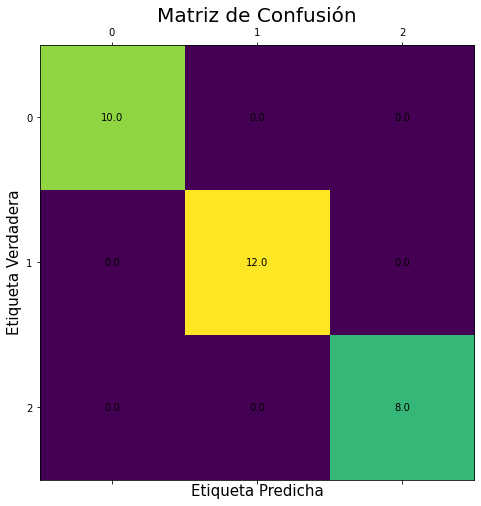

In [24]:
cm_poli = confusion_matrix(y_test, y_pred_poly)
fig, ax = plt.subplots(figsize=(12,8))
ax.matshow(cm_poli)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm_poli):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [25]:
print(classification_report(y_test, y_pred_poly))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



### 2. Kernel Gaussiano

In [26]:
svc_gauss = SVC(kernel='rbf', gamma='auto')
svc_gauss.fit(X_train, y_train)

SVC(gamma='auto')

In [27]:
y_pred_gauss = svc_gauss.predict(X_test)

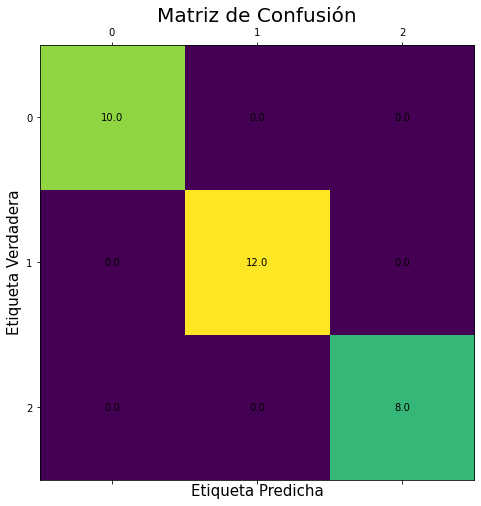

In [28]:
cm_gauss = confusion_matrix(y_test, y_pred_gauss)
fig, ax = plt.subplots(figsize=(12,8))
ax.matshow(cm_gauss)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm_gauss):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [29]:
print(classification_report(y_test, y_pred_gauss))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



### 3. Kernel Sigmoide

In [30]:
svc_sigmoid = SVC(kernel='sigmoid', gamma='auto')
svc_sigmoid.fit(X_train, y_train)

SVC(gamma='auto', kernel='sigmoid')

In [31]:
y_pred_sigmoid = svc_sigmoid.predict(X_test)

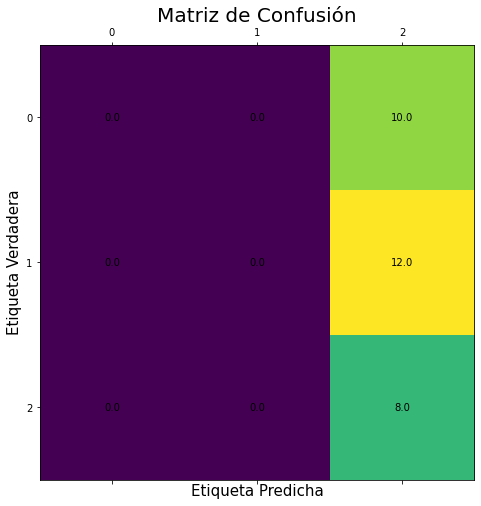

In [32]:
cm_sigm = confusion_matrix(y_test, y_pred_sigmoid)
fig, ax = plt.subplots(figsize=(12,8))
ax.matshow(cm_sigm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm_sigm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [33]:
print(classification_report(y_test, y_pred_sigmoid))

                 precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00        10
Iris-versicolor       0.00      0.00      0.00        12
 Iris-virginica       0.27      1.00      0.42         8

       accuracy                           0.27        30
      macro avg       0.09      0.33      0.14        30
   weighted avg       0.07      0.27      0.11        30



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
